In [ ]:
# Install Necessary Packages
#install.packages("igraph")
#install.packages("pracma")
#install.packages("entropy")

library('pracma')
library('igraph')
library('entropy')

### Question 18 - Number of personal networks for users who have more than 2 circles

In [ ]:
DATA_PATH <- "data/gplus/"

files <- list.files(path= DATA_PATH, pattern="*.circles")
network_count <- 0
for (file in files){
  circle_data <- paste("data/gplus/", file, sep="")
  if (length(readLines(circle_data)) > 2){
    network_count <- network_count + 1
  }
}
sprintf("Number of Personalized Networks for users with more than 2 circles is %d", network_count)

[1] "Number of Personalized Networks for users with more than 2 circles is 57"

### Question 19
The degree distribution for the 3 following personal networks:
- 109327480479767108490
- 115625564993990145546
- 101373961279443806744

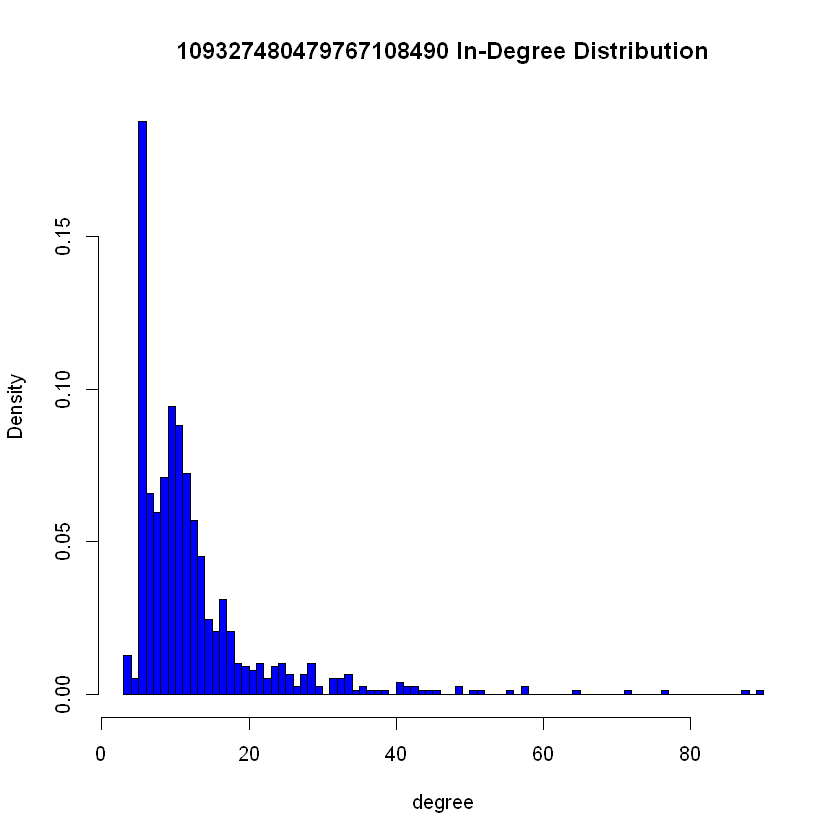

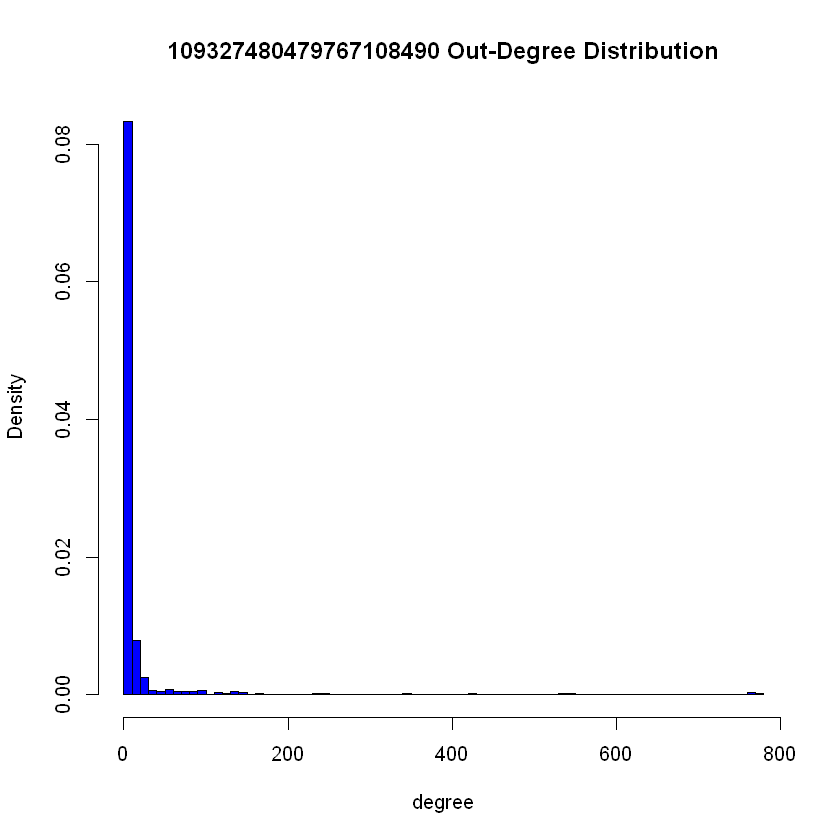

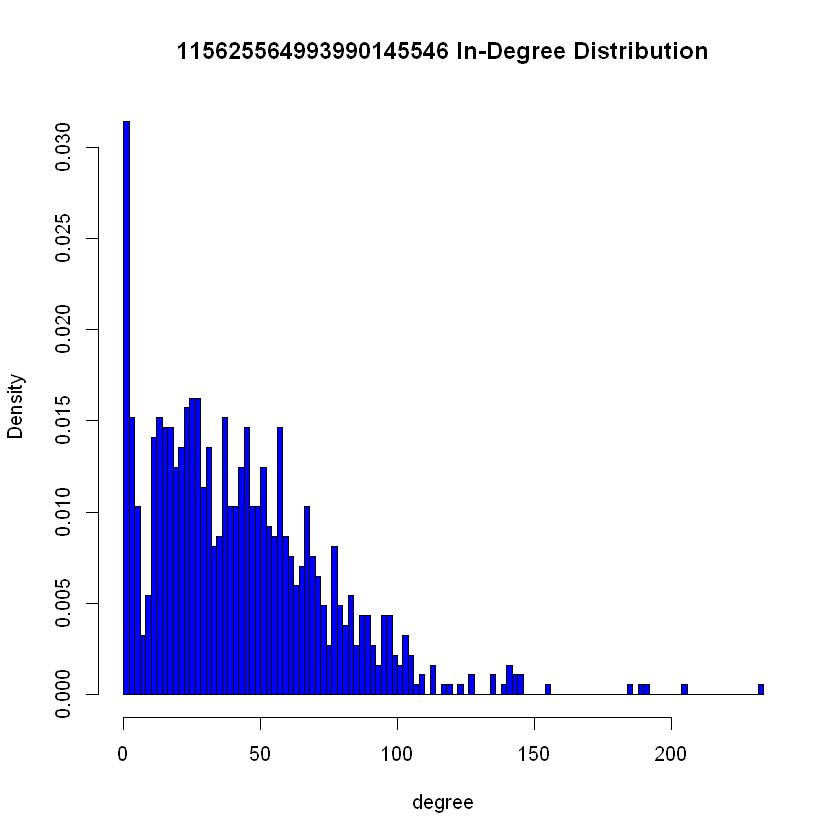

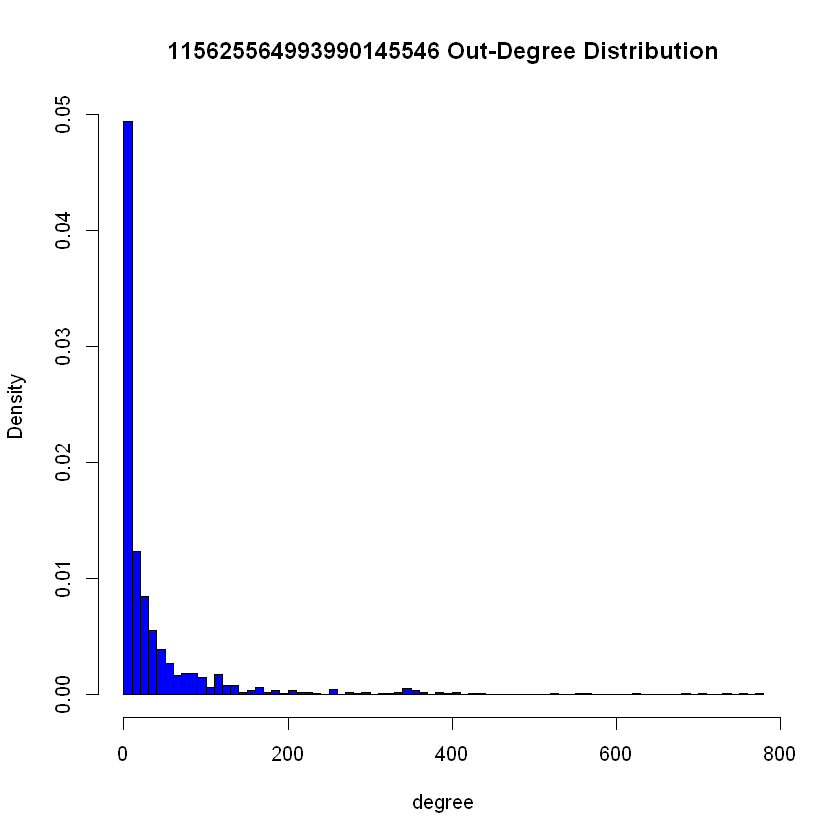

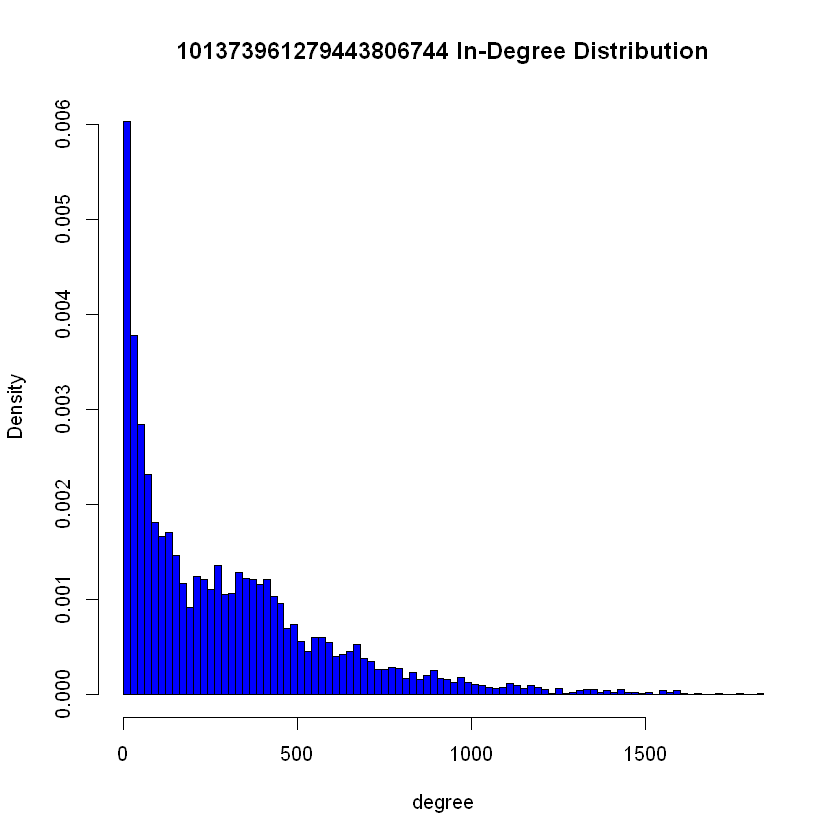

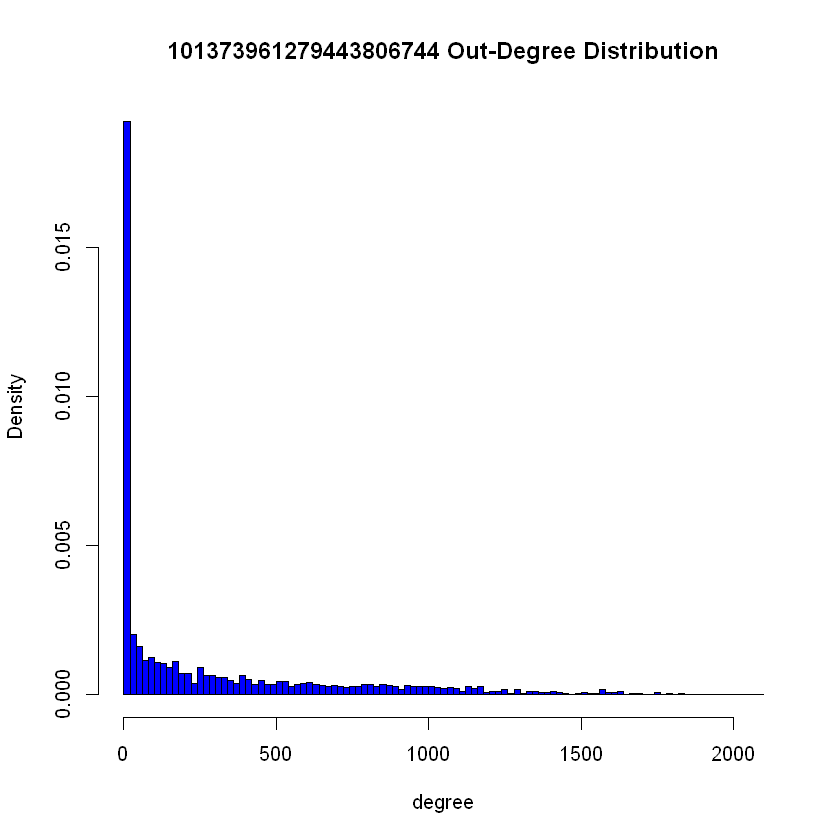

In [ ]:
network_list <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")

for (node in network_list){
    # print(sprintf("Network ID: %s", node))
    
    filename <- paste(getwd(), "/", DATA_PATH, node, ".edges", sep="")
    g <- read_graph(filename, format="ncol", directed=TRUE)
    
    hist(degree(g, mode="in"), 
         breaks=100, 
         freq=FALSE, 
         col='blue', 
         xlab='degree', 
         main=paste(node, "In-Degree Distribution"))
    
    hist(degree(g, mode="out"), 
         breaks=100, 
         freq=FALSE, 
         col='blue', 
         xlab='degree', 
         main=paste(node, "Out-Degree Distribution"))

}

### Question 20
Using the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Find the modularity scores and plot the communities using colors.

[1] "Modularity of Node ID 109327480479767108490 is 0.25277"
[1] "Modularity of Node ID 115625564993990145546 is 0.31947"


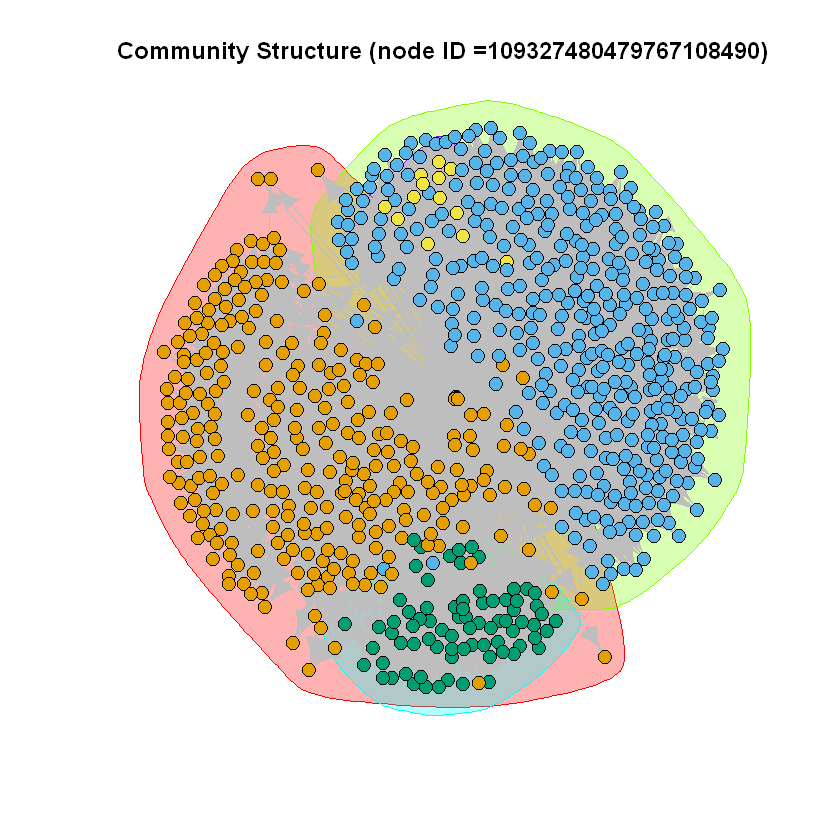

[1] "Modularity of Node ID 101373961279443806744 is 0.19109"


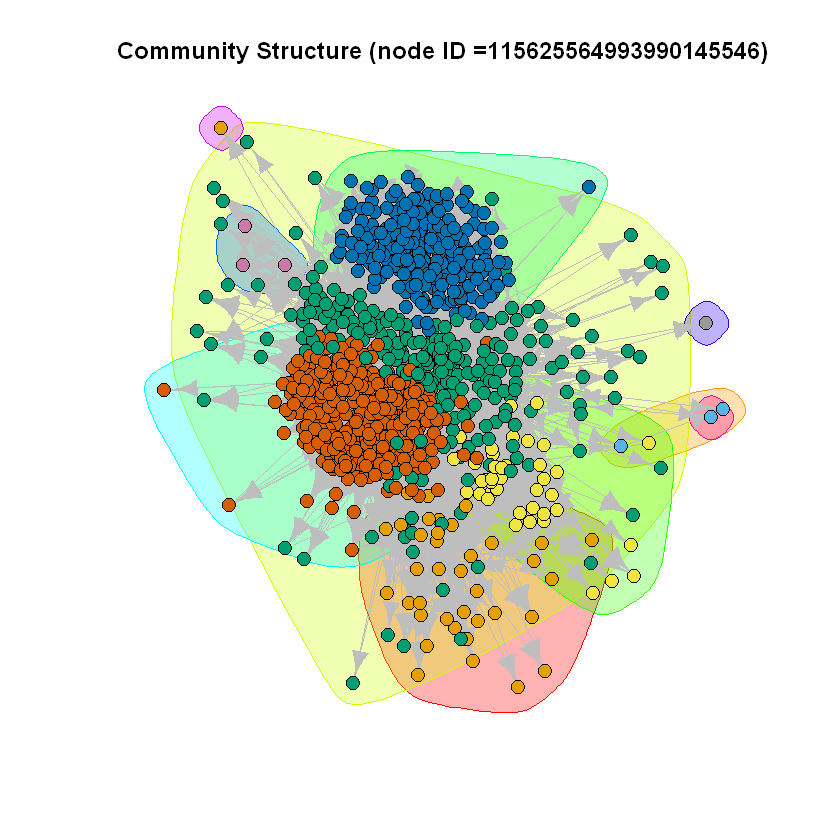

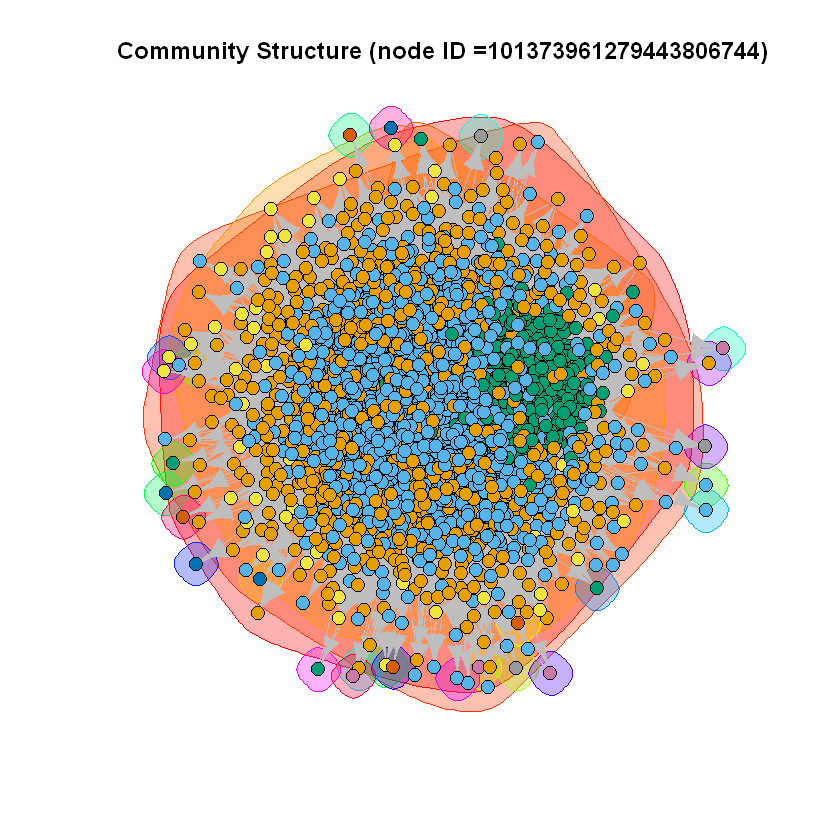

In [ ]:
network_list <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")

for (node in network_list){
    # print(sprintf("Network ID: %s", node))
    
    filename <- paste(getwd(), "/", DATA_PATH, node, ".edges", sep="")
    google_graph <- read_graph(filename, format="ncol", directed=TRUE)
    google_graph <- add.vertices(google_graph, nv=1, name=node)
    
    edge_idx <- which(V(google_graph)$name==node)
    
    edge_list <- c()
    for (vertex in 1:(vcount(google_graph) - 1)){
        edge_list <- c(edge_list, c(edge_idx, vertex))
    }
    
    google_graph <- add_edges(google_graph, edge_list)
    
    node_community <- cluster_walktrap(google_graph)
    node_modularity <- modularity(node_community)
    
    print(sprintf("Modularity of Node ID %s is %2.5f", node, node_modularity))
    
    plot(node_community, 
         google_graph, 
         main=sprintf("Community Structure (node ID =%s)",node),
         vertex.size=5, 
         vertex.label=NA, 
         edge.color = "grey")

}

### Question 21

In [ ]:
network_list = c("109327480479767108490", "115625564993990145546", "101373961279443806744")

for (node in network_list){
    # Read circles files
    circles_file_name = paste(DATA_PATH, node, ".circles", sep="")
    circles_file_content = readLines(file(circles_file_name, open="r"))
    
    circles = list()
    for (var in 1:length(circles_file_content)){
        circle_nodes = strsplit(circles_file_content[var], "\t")
        circles = c(circles, list(circle_nodes[[1]][-1]))
    }
    
    # Calculate total number of people with circle information (N)
    all_circles = c()
    for (circle in circles){
        all_circles = c(all_circles, circle)
    }
    all_circle_u = unique(all_circles)
    N = length(all_circle_u)
    
    # Calculate circle entropy H(C)
    h_c = 0
    for (circle in circles) {
        a_i = length(circle)
        h_c = h_c - ((a_i / N) * log10(a_i / N))
    }
    
    # Load edges files
    nodes_file_name = paste(DATA_PATH, node, ".edges", sep="")
    node_graph = read_graph(nodes_file_name, format="ncol", directed=TRUE)
    node_graph = add.vertices(node_graph, nv=1, name=node)
    
    node_idx = which(V(node_graph)$name==node)
    
    edge_list = c()
    for (vertex in 1:(vcount(node_graph) - 1)){
        edge_list = c(edge_list, c(node_idx, vertex))
    }
    
    node_graph = add_edges(node_graph, edge_list)
    node_community = walktrap.community(node_graph)
    
    # Find community entropy H(K) and conditional terms H(C|K) and H(K|C)
    h_ck=0
    h_kc=0
    h_k=0
    
    for (m in 1:max(node_community$membership)){
        
        community_nodes = V(node_graph)$name[which(node_community$membership == m)]
        b_i = length(intersect(community_nodes, all_circle_u))
        if (b_i != 0){
            h_k = h_k - ((b_i / N) * log10(b_i / N))
            for (n in 1:length(circles)){
                common_nodes = intersect(community_nodes, circles[[n]])
                c_ij = length(unique(common_nodes))
                A_i = length(circles[[n]])
                if (c_ij != 0){
                    h_ck = h_ck - ((c_ij / N) * log10(c_ij / b_i))
                    h_kc = h_kc - ((c_ij / N) * log10(c_ij / A_i))
                }
            }
        }        
    }
    
    # Calculate homogenity and completeness
    homogenity = 1 - (h_ck / h_c)
    completeness = 1 - (h_kc / h_k)
    
    print(sprintf("Entropy H(C) = %.6f",h_c))
    print(sprintf("Entropy H(K) = %.6f",h_k))
    print(sprintf("Conditional Entropy H(C|K) = %.6f",h_ck))
    print(sprintf("Conditional Entropy H(K|C) = %.6f",h_kc))
    
    print(sprintf("Homogeneity h= %5.8f", homogenity))
    print(sprintf("Completeness c= %5.8f", completeness))

    cat("\n")
    
    
}

[1] "Entropy H(C) = 0.456348"
[1] "Entropy H(K) = 0.436556"
[1] "Conditional Entropy H(C|K) = 0.067592"
[1] "Conditional Entropy H(K|C) = 0.292548"
[1] "Homogeneity h= 0.85188512"
[1] "Completeness c= 0.32987391"

[1] "Entropy H(C) = 3.676366"
[1] "Entropy H(K) = 0.469555"
[1] "Conditional Entropy H(C|K) = 2.015052"
[1] "Conditional Entropy H(K|C) = 2.077295"
[1] "Homogeneity h= 0.45189030"
[1] "Completeness c= -3.42396235"

[1] "Entropy H(C) = 0.166908"
[1] "Entropy H(K) = 0.214251"
[1] "Conditional Entropy H(C|K) = 0.166263"
[1] "Conditional Entropy H(K|C) = 0.536535"
[1] "Homogeneity h= 0.00386671"
[1] "Completeness c= -1.50423839"

